In [20]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
hostnames = []
dataset = []
df = None

In [22]:
def set_hostnames(number_of_hosts:int) -> None:
    operativos = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    entornos = ['D']*2 + ['I']*2 + ['T']*5 + ['S']*5 + ['P']*6
    paises = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        pais = random.choice(paises)
        sistema = random.choice(operativos) + random.choice(entornos)
        sistema += pais
        grupo_alpha.append(sistema)
        sistema += str(grupo_alpha.count(sistema)).zfill(3)
        hostnames.append(sistema)
        

In [23]:
def get_os(hostname: str) ->str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Desconocido'

In [24]:
def get_environment(hostname:str) ->str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Desconocido'

In [25]:
def get_country(hostname:str) ->str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'FRA':
        return 'France'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    else:
        return 'Desconocido'
    

In [26]:
def set_dataframe(count: int) ->None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname' : hostname,
            'os' : get_os(hostname),
            'environment' : get_environment(hostname),
            'country' : get_country(hostname),
            'node' : int(hostname[-3:])
        })
    df=pd.DataFrame(dataset) 

In [27]:
set_dataframe(1500)

In [28]:
df

,hostname,os,environment,country,node
0,AIDEU001,AIX,Integration,Germany,1
1,APESP001,AIX,Production,Spain,1
2,ATITA001,AIX,Testing,Italy,1
3,ASESP001,AIX,Staging,Spain,1
4,LTDEU001,Linux,Testing,Germany,1
...,...,...,...,...,...
1495,LDITA018,Linux,Development,Italy,18
1496,ASESP016,AIX,Staging,Spain,16
1497,SPIRL037,Solaris,Production,Ireland,37
1498,SSFRA012,Solaris,Staging,France,12


In [29]:
df.to_csv('hosts.csv',header=True, index=False)

In [30]:
df = pd.read_csv(r'hosts.csv',
                encoding='ISO-8859-1',
                delimiter=',')

In [31]:
df

,hostname,os,environment,country,node
0,AIDEU001,AIX,Integration,Germany,1
1,APESP001,AIX,Production,Spain,1
2,ATITA001,AIX,Testing,Italy,1
3,ASESP001,AIX,Staging,Spain,1
4,LTDEU001,Linux,Testing,Germany,1
...,...,...,...,...,...
1495,LDITA018,Linux,Development,Italy,18
1496,ASESP016,AIX,Staging,Spain,16
1497,SPIRL037,Solaris,Production,Ireland,37
1498,SSFRA012,Solaris,Staging,France,12


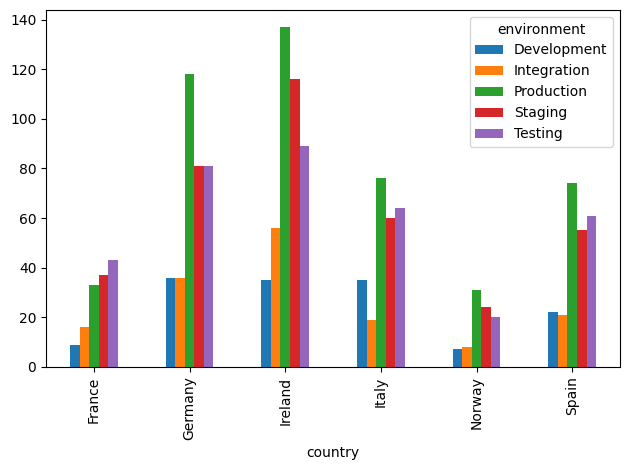

In [32]:
d = df.groupby(['country','environment']).size()
d.unstack().plot(kind='bar')
plt.tight_layout()
plt.show()


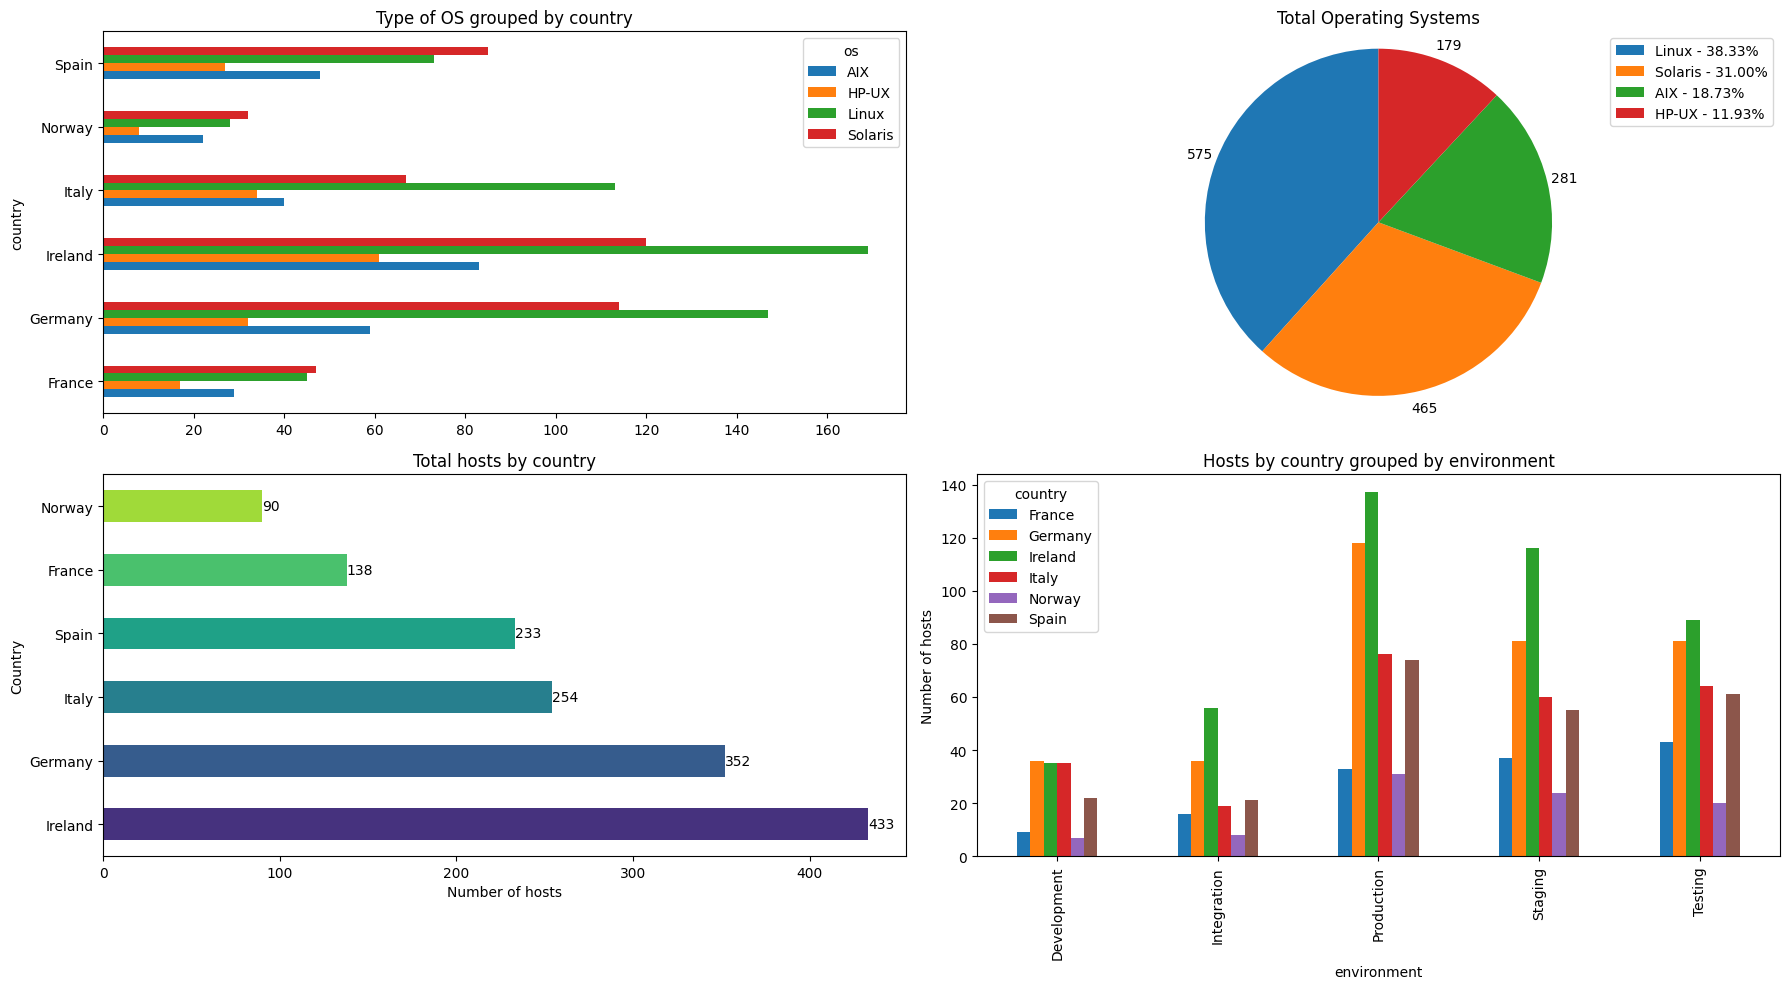

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))

df.groupby(['country','os']).size().unstack().plot(kind='barh', ax=axs[0,0])
axs[0,0].set_title('Type of OS grouped by country')


category_counts = df['os'].value_counts()
category_counts.plot(kind='pie', labels=None, autopct=lambda p: '{:.0f}'.format(p * sum(category_counts) / 100), 
                     ax=axs[0,1], startangle=90, pctdistance=1.1)
axs[0, 1].set_title('Total Operating Systems')
legend_labels = [f'{label} - {percentage:.2%}' for label, count, percentage in zip(category_counts.index, category_counts, category_counts / category_counts.sum())]
axs[0,1].legend(legend_labels, title=None, loc='upper right')
axs[0,1].axis('equal')
axs[0,1].yaxis.set_visible(False)

total_hosts= df['country'].value_counts()
colores = sns.color_palette('viridis', len(total_hosts))
total_hosts.plot(kind='barh', color=colores, ax=axs[1,0])
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')
for index, value in enumerate(total_hosts):
    axs[1,0].text(value, index, str(value), ha='left', va='center')

df.groupby(['country','environment']).size().unstack(0).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1,1].set_ylabel('Number of hosts')

plt.tight_layout()
plt.show()